In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("phone_battery_life_test.csv")

In [3]:
dataset

,Mobile_Brand,Battery_Capacity_mAh,Release_Year,Gaming,App_Usage,Battery_Life_Hours,Max_Battery_Health_Years
0,Samsung,5000,2023,Yes,High,8,3.0
1,Apple,4323,2022,No,Low,15,4.0
2,Xiaomi,6000,2021,Yes,High,6,2.5
3,OnePlus,4500,2023,No,Medium,12,3.0
4,Google,4080,2020,Yes,Low,9,3.0
5,Oppo,5000,2021,No,High,11,3.0
6,Vivo,4000,2019,Yes,Medium,7,2.5
7,Huawei,4200,2019,No,Low,10,3.0
8,Motorola,5000,2022,Yes,High,8,3.0
9,Realme,4500,2023,No,Medium,13,3.5


In [4]:
dataset=pd.get_dummies(dataset,dtype= int,drop_first= True)

In [5]:
dataset

,Battery_Capacity_mAh,Release_Year,Battery_Life_Hours,Max_Battery_Health_Years,Mobile_Brand_Google,Mobile_Brand_Huawei,Mobile_Brand_Motorola,Mobile_Brand_OnePlus,Mobile_Brand_Oppo,Mobile_Brand_Realme,Mobile_Brand_Samsung,Mobile_Brand_Vivo,Mobile_Brand_Xiaomi,Gaming_Yes,App_Usage_Low,App_Usage_Medium
0,5000,2023,8,3.0,0,0,0,0,0,0,1,0,0,1,0,0
1,4323,2022,15,4.0,0,0,0,0,0,0,0,0,0,0,1,0
2,6000,2021,6,2.5,0,0,0,0,0,0,0,0,1,1,0,0
3,4500,2023,12,3.0,0,0,0,1,0,0,0,0,0,0,0,1
4,4080,2020,9,3.0,1,0,0,0,0,0,0,0,0,1,1,0
5,5000,2021,11,3.0,0,0,0,0,1,0,0,0,0,0,0,0
6,4000,2019,7,2.5,0,0,0,0,0,0,0,1,0,1,0,1
7,4200,2019,10,3.0,0,1,0,0,0,0,0,0,0,0,1,0
8,5000,2022,8,3.0,0,0,1,0,0,0,0,0,0,1,0,0
9,4500,2023,13,3.5,0,0,0,0,0,1,0,0,0,0,0,1


In [6]:
dataset.columns

Index(['Battery_Capacity_mAh', 'Release_Year', 'Battery_Life_Hours',
       'Max_Battery_Health_Years', 'Mobile_Brand_Google',
       'Mobile_Brand_Huawei', 'Mobile_Brand_Motorola', 'Mobile_Brand_OnePlus',
       'Mobile_Brand_Oppo', 'Mobile_Brand_Realme', 'Mobile_Brand_Samsung',
       'Mobile_Brand_Vivo', 'Mobile_Brand_Xiaomi', 'Gaming_Yes',
       'App_Usage_Low', 'App_Usage_Medium'],
      dtype='object')

In [7]:
independent=dataset[['Mobile_Brand_Vivo','Release_Year','Battery_Capacity_mAh','Battery_Life_Hours','Gaming_Yes','App_Usage_Low']]
independent

,Mobile_Brand_Vivo,Release_Year,Battery_Capacity_mAh,Battery_Life_Hours,Gaming_Yes,App_Usage_Low
0,0,2023,5000,8,1,0
1,0,2022,4323,15,0,1
2,0,2021,6000,6,1,0
3,0,2023,4500,12,0,0
4,0,2020,4080,9,1,1
5,0,2021,5000,11,0,0
6,1,2019,4000,7,1,0
7,0,2019,4200,10,0,1
8,0,2022,5000,8,1,0
9,0,2023,4500,13,0,0


In [8]:
dependent=dataset[['Max_Battery_Health_Years']]
dependent

,Max_Battery_Health_Years
0,3.0
1,4.0
2,2.5
3,3.0
4,3.0
5,3.0
6,2.5
7,3.0
8,3.0
9,3.5


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

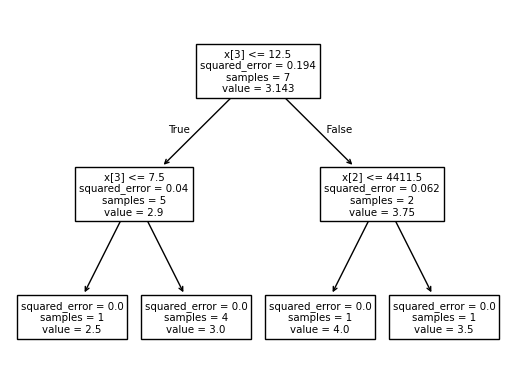

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [12]:
Y_pred=regressor.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,Y_pred)

In [14]:
r_score

1.0

In [15]:
import pickle
scaler_file="scaler_x.pkl"
pickle.dump(regressor,open(scaler_file,"wb"))
regressor=pickle.load(open("scaler_x.pkl",'rb'))

In [16]:
import pickle

In [17]:
filename="Decision Tree for phone charging test.sav"

In [18]:
pickle.dump(regressor,open(filename,'wb'))

In [19]:
loaded_module=pickle.load(open("Decision Tree for phone charging test.sav",'rb'))

In [20]:
preinput=([[27,35,0,1,0, 32]])
preinput

[[27, 35, 0, 1, 0, 32]]

In [21]:
result=loaded_module.predict(preinput)
result

C:\Anaconda\envs\webd\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2.5])